# Data Quality Experiments

Let us peak inside a dataset and see what we find out.

We will be looking for the following:

1. Completeness:
Completeness refers to how much information is available for all entities within your dataset. It assesses whether there are any missing values in your data. A higher level of completeness indicates that there are fewer missing values, ensuring that your dataset contains a comprehensive representation of the entities it describes. To evaluate completeness, you can count the number of missing values for each attribute or entity.

1. Consistency:
Consistency measures how uniform and consistent your data is throughout the dataset. It involves identifying and quantifying the number of inconsistencies or discrepancies within your data. These inconsistencies could include variations in data formats, naming conventions, or conflicting information. Maintaining data consistency is crucial for reliable analysis and reporting.

1. Accuracy:
Accuracy assesses how correct and error-free your data is. It involves identifying and counting the number of errors within your dataset. Errors could be typographical, computational, or factual inaccuracies. Accurate data is essential for making informed decisions and avoiding misleading conclusions.

1. Relevancy/Auditability:
Relevancy or auditability focuses on the presence of relevant data within your dataset. It involves evaluating the number of irrelevant values or records that do not contribute to the goals of your analysis or business needs. Ensuring that your dataset contains only pertinent information enhances its usability and effectiveness.

1. Validity:
Validity checks whether the data in your dataset adheres to predefined rules or allowable values. It involves validating data against established constraints or criteria to ensure that it meets quality standards. Valid data is trustworthy and conforms to expected norms, reducing the risk of using incorrect or invalid information.

1. Uniqueness:
Uniqueness measures how many duplicate values or records exist within your dataset. It is essential to identify and eliminate duplicates, as they can skew analysis results and waste storage resources. Maintaining data uniqueness ensures that each entity or data point is represented only once.

1. Timeliness:
Timeliness assesses how up-to-date your data is. It involves determining whether the data has been regularly updated to reflect the current state of the entities it describes. Timely data is critical for making decisions based on current information, especially in dynamic environments where data can quickly become outdated.

Evaluating these data quality dimensions is essential for ensuring that your dataset is reliable, accurate, and suitable for your intended purposes. It helps in making informed decisions, conducting meaningful analyses, and maintaining data integrity over time.

In [1]:
# imports
# pandas library for i/o and dataframes 
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# get some utils
from v1.utils import calculate_decimal_point as cdp

In [2]:
# declare some constants
FIG_SIZE=(8, 6)

# expected rows
ROWS_EXPECTED = 9568

# expected dataset shape
EXPECTED_SHAPE = (9568, 5)

# expected columns
EXPECTED_COLUMNS = {'AT', 'V', 'AP', 'RH', 'PE'}

# expected decimals
EXPECTED_DECIMALS = 2

## Loading data 

We will use a CCPP data. Here is what we know about the data falls with the following specifications
source: https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

All of this information will be used to help us validate the dataset!

See image below for more details.

![Alt text](static/combined+cycle+power+plant_Dataset.png)

![Alt text](image.png)

### Few important things of Note:

1. The data we have - are averaged!
1. The variables are given without normalization

So keep this in mind for when you design your experiment or model.

In [3]:
# get data from the source
try:
    raw_ccpp_data = pd.read_csv('https://storage.googleapis.com/aipi_datasets/CCPP_data.csv',
                                skipinitialspace=True)
except Exception as ex:
    print(f'Was able to download source data -> {ex}')

## Exploring Our Data

Examine the dataset's dimensions.
Retrieve a list of columns.
Utilize the describe() function for insights

In [4]:
# let us check that our dataset contains expected columns 
if EXPECTED_COLUMNS.issubset(raw_ccpp_data.columns):
    print('All columns present')
else:
    print ('Missing column detected')

All columns present


In [5]:
# we can also check a shape
if raw_ccpp_data.shape != EXPECTED_SHAPE:
    print(f'Dataset shape is not expected. Expecte {EXPECTED_SHAPE} but retrieved {raw_ccpp_data.shape}')
else:
    print('Data shape as expected')

Data shape as expected


In [6]:
# Display columns of dataset
# note if you need only columns list use this -> raw_ccpp_data.columns
raw_ccpp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
# Compute summary statistics to get a better understanding of the data.
raw_ccpp_data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Identifying and Retaining Relevant Columns

In most cases, it's essential to assess whether there are any columns that should be dropped from our dataset due to their irrelevance to our task. However, it's worth noting that, in this particular scenario, we intend to retain all the columns, as they are deemed pertinent for our analysis.

In [ ]:
# Drop irrelevant columns (modify this based on your assessment)
# raw_ccpp_data = raw_ccpp_data.drop(['Irrelevant_Column1', 'Irrelevant_Column2'], axis=1)

## Assessing Data Completeness

Our initial step involves a straightforward procedure: we will conduct a Count operation to determine the quantity of missing values present in each column of the dataset.

It's essential to emphasize that this step is crucial in verifying compliance with the dataset specifications, as our goal is to confirm the absence of any missing data.

In [8]:
# set overall flag
failed = False

# let us check for nulls
completeness = raw_ccpp_data.isnull().sum()

# check each column
for column in completeness:
    if column > 0:
        failed = True
        print(f'missing data detected in column {column}')


# display overall result
if failed:
    print('Missing data detected. Please review previous message(s)')
else:
    print('Data is complete')

Data complete


We can also use missingno to take a look at our dataset

The "missingno" library provides a set of tools for visualizing and working with missing data in a dataset. It's particularly helpful for identifying and visualizing missing values in a dataset, which can be crucial for data quality assessment and data cleaning.

Once you've imported "missingno" with the alias "msno," you can use its functions and capabilities by prefixing them with "msno." For example, you can use ```msno.matrix(raw_ccpp_data)``` to create a matrix plot that visualizes missing values in your dataset.

In the example below, ```msno.matrix(raw_ccpp_data)``` creates a visual representation of missing values in the DataFrame "df." This can be useful for quickly identifying which columns or rows have missing data in your dataset.

In opur case absense of anything in this plot is actually a good thing - data is complete!

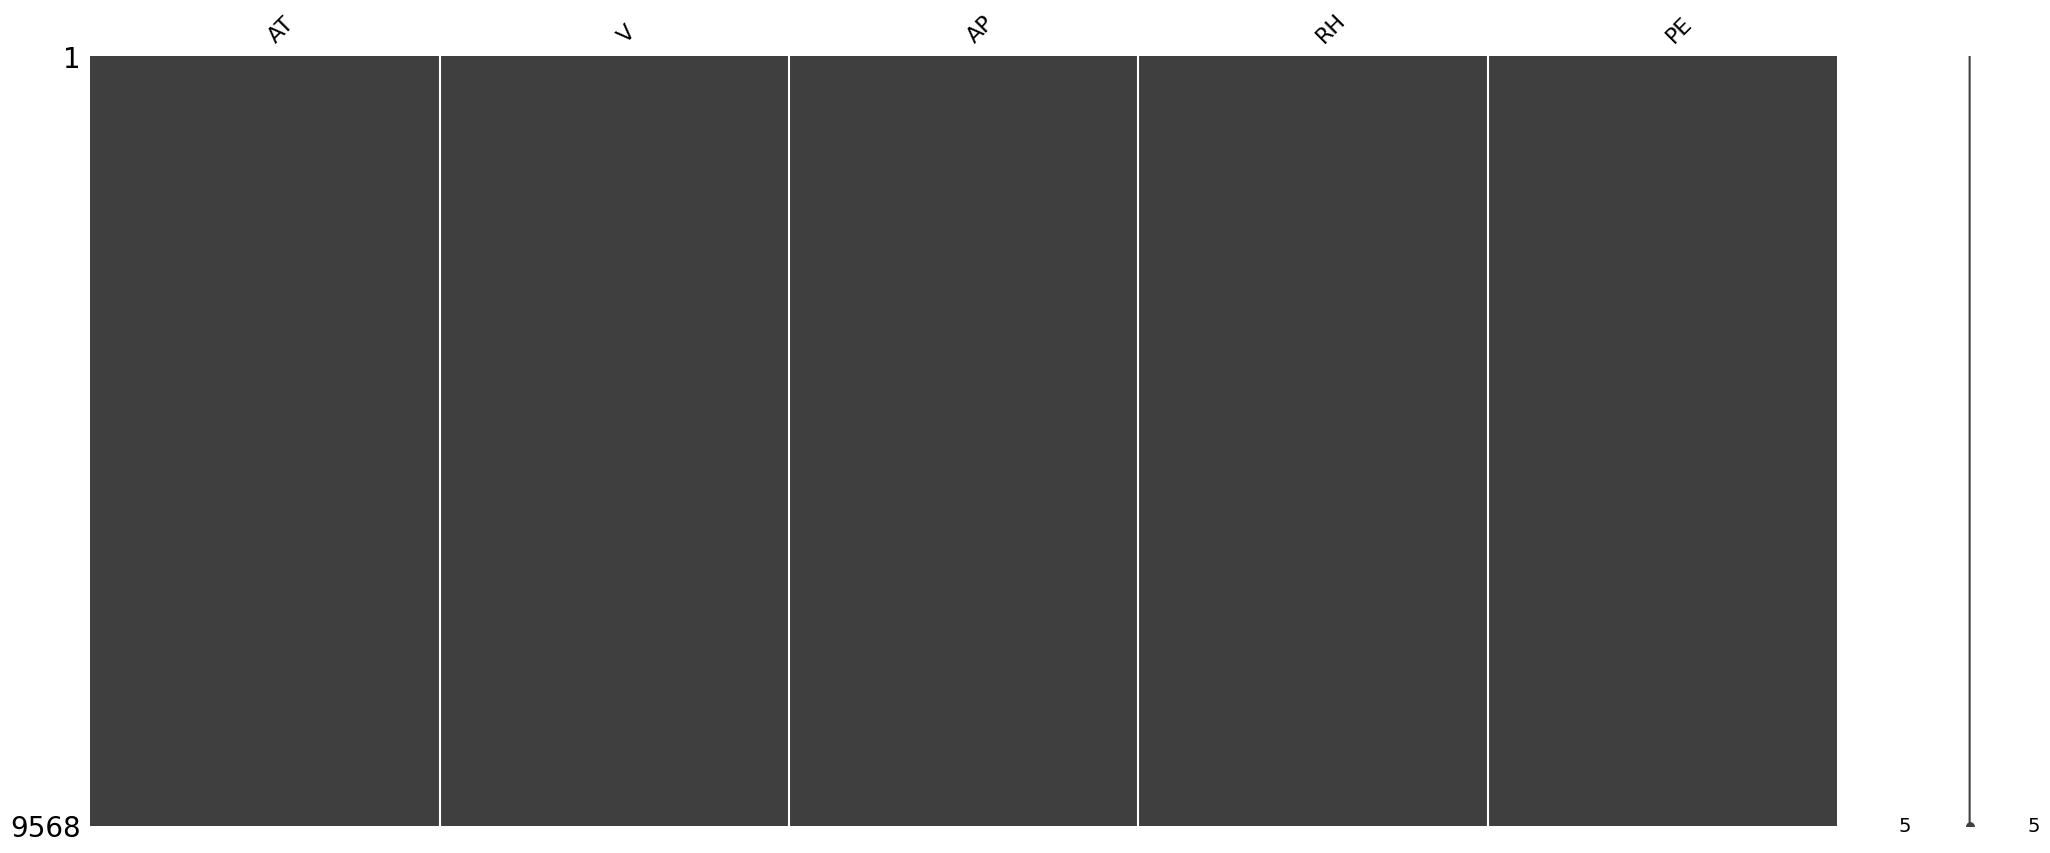

<Figure size 800x600 with 0 Axes>

In [9]:
msno.matrix(raw_ccpp_data)
plt.figure(figsize = FIG_SIZE)
plt.show()

## Ensuring Data Consistency

We will perform several checks:

1. Numeric Precision: We anticipate that all numeric columns should maintain a uniform precision of two decimal places.
1. Date Format Verification: We will validate that date entries adhere to the MM/DD/YYYY format to ensure consistent date representation.
1. Timezone Alignment: Another aspect of our consistency check involves confirming that timezones within the dataset align appropriately to avoid any discrepancies.
1. Boolean Conformity: For boolean values, we will verify that they are expressed as 'True' or 'False,' rather than as '0' or '1,' in accordance with our data standards."
1. Other
    1. for example check that state is the same WA vs Washington vs washington

In [10]:
# check AT column
consistency_AT = pd.to_numeric(raw_ccpp_data['AT'], errors='coerce').notnull().all()
if consistency_AT != True:
    print(f'Detected unexpected non-numeric values in AT column')

# check V column
consistency_V = pd.to_numeric(raw_ccpp_data['V'], errors='coerce').notnull().all()
if consistency_V != True:
    print(f'Detected unexpected non-numeric values in V column')

# check AP column
consistency_AP = pd.to_numeric(raw_ccpp_data['AP'], errors='coerce').notnull().all()
if consistency_AP != True:
    print(f'Detected unexpected non-numeric values in AP column')

# check RH column
consistency_RH = pd.to_numeric(raw_ccpp_data['RH'], errors='coerce').notnull().all()
if consistency_RH != True:
    print(f'Detected unexpected non-numeric values in RH column')

# check PE column
consistency_PE = pd.to_numeric(raw_ccpp_data['PE'], errors='coerce').notnull().all()
if consistency_PE != True:
    print(f'Detected unexpected non-numeric values in PE column')

### Verifying Decimal Precision

Our primary objective in this step is to ensure that all numerical values conform to a specific format, specifically: 123456.##. To accomplish this, we will scrutinize each numeric entry in the dataset, confirming that they consistently exhibit two decimal places. This meticulous examination is crucial for maintaining data uniformity and precision, ensuring that our numerical data aligns with our established standards.

In [12]:
# checking AT column
decimals_AT = raw_ccpp_data['AT'].apply(lambda x: cdp(x)).max()
if decimals_AT != EXPECTED_DECIMALS:
    print(f'Expected {EXPECTED_DECIMALS} decimal points but received {decimals_AT}')

# checking V column
decimals_V = raw_ccpp_data['V'].apply(lambda x: cdp(x)).max()
if decimals_V != EXPECTED_DECIMALS:
    print(f'Expected {EXPECTED_DECIMALS} decimal points but received {decimals_V}')

# checking AP column
decimals_AP = raw_ccpp_data['AP'].apply(lambda x: cdp(x)).max()
if decimals_AP != EXPECTED_DECIMALS:
    print(f'Expected {EXPECTED_DECIMALS} decimal points but received {decimals_AP}')

# checking RH column
decimals_RH = raw_ccpp_data['RH'].apply(lambda x: cdp(x)).max()
if decimals_RH != EXPECTED_DECIMALS:
    print(f'Expected {EXPECTED_DECIMALS} decimal points but received {decimals_RH}')

# checking PE column
decimals_PE = raw_ccpp_data['PE'].apply(lambda x: cdp(x)).max()
if decimals_PE != EXPECTED_DECIMALS:
    print(f'Expected {EXPECTED_DECIMALS} decimal points but received {decimals_PE}')

## Data Accuracy

Thoroughly inspect and validate that the data conforms to the predetermined ranges and boundaries established for its proper functioning and meaningful interpretation. This process involves meticulous examination to confirm that each data point aligns precisely with the specified criteria, ensuring data integrity and reliability.

This data validation procedure is vital for a variety of applications, including quality control, statistical analysis, and database management. It serves as a safeguard against errors, outliers, and potential data corruption, thereby facilitating informed decision-making and preventing unintended consequences arising from inaccuracies or discrepancies.

The meticulous scrutiny involves not only checking the immediate values but also considering the context and dependencies within the dataset. Any deviations from the prescribed ranges may necessitate corrective actions or further investigation to maintain data consistency and accuracy. In essence, ensuring that data falls within specified ranges is a fundamental step in upholding data quality and facilitating its meaningful utilization.

Note: we really not sure about any interdependencies so will skip the last part

In [13]:
# check AT column
accuracy_AT = raw_ccpp_data[['AT']].query('(AT >= 1.81 & AT <= 37.11)')
if accuracy_AT.shape[0] != ROWS_EXPECTED:
    print(f'Detected {accuracy_AT.shape[0] - ROWS_EXPECTED} values in AT column that are outside of the specified range')

# check V column
accuracy_V = raw_ccpp_data[['V']].query('(V >= 25.36 & V <= 81.56)')
if accuracy_V.shape[0] != ROWS_EXPECTED:
    print(f'Detected {accuracy_V.shape[0] - ROWS_EXPECTED} values in V column that are outside of the specified range')

# check AP column
accuracy_AP = raw_ccpp_data[['AP']].query('(AP >= 992.89 & AP <= 1033.30)')
if accuracy_AP.shape[0] != ROWS_EXPECTED:
    print(f'Detected {accuracy_AP.shape[0] - ROWS_EXPECTED} values in AP column that are outside of the specified range')

# check RH column
accuracy_RH = raw_ccpp_data[['RH']].query('(RH >= 25.56 & RH <= 100.16)')
if accuracy_RH.shape[0] != ROWS_EXPECTED:
    print(f'Detected {accuracy_RH.shape[0] - ROWS_EXPECTED} values in RH column that are outside of the specified range')

# check PE column
accuracy_PE = raw_ccpp_data[['PE']].query('(PE >= 420.26 & PE <= 495.76)')
if accuracy_PE.shape[0] != ROWS_EXPECTED:
    print(f'Detected {accuracy_PE.shape[0] - ROWS_EXPECTED} values in PE column that are outside of the specified range')

## Relevancy/Auditability

Now, we venture into the realm of subject matter expertise (SME), requiring a profound comprehension of the data before embarking on rigorous data quality assessments.

In this phase, the focus shifts towards discerning the relevance and auditability of the data. It entails a comprehensive exploration of the dataset's intricacies and nuances to ascertain its alignment with the specific objectives and context in which it will be utilized. Here, subject matter experts play a pivotal role, bringing their deep domain knowledge to the fore.

To determine relevance, one must carefully evaluate whether the data at hand addresses the key questions or issues that prompted its collection. This involves not only considering the variables and attributes but also understanding how they interrelate and influence the overarching goals of the analysis.

Moreover, auditability comes into play, emphasizing the necessity of establishing a robust trail of data lineage, transformations, and processing steps. An auditable dataset ensures that every data point can be traced back to its source and that any transformations or manipulations are well-documented and transparent. This is essential for maintaining data integrity, regulatory compliance, and for building trust in the data's credibility.

During this phase, experts delve into the intricacies of the data, gaining insights into potential biases, anomalies, or limitations that may impact its usability. They may also identify data gaps that need to be addressed for a more comprehensive analysis. Consequently, subject matter expertise is invaluable in guiding the subsequent data quality tests and in tailoring them to the unique characteristics and demands of the dataset, ensuring that the data is not only accurate but also relevant and auditable for the intended purpose.

In [ ]:
#

pass

## Validity

As with previous considerations around *Relevancy/Auditability*, the assessment of data validity necessitates an deep familiarity with the dataset, coupled with a profound understanding of the expected values and their significance.

Data validity, in essence, is the determination of how well the data aligns with the predefined criteria or standards. To carry out this assessment effectively, one must possess a keen insight into the intricacies of the data, backed by a comprehensive comprehension of the anticipated values within it.

This process extends beyond merely confirming the data's existence; it delves into evaluating whether the data accurately represents the real-world entities or phenomena it is intended to capture. This often involves examining the data against a set of established rules, constraints, or expectations. It is at this juncture that subject matter expertise and contextual knowledge are paramount.

A deep understanding of expected values allows data professionals to discern whether the data points fall within the permissible ranges or adhere to the anticipated patterns. Any deviations from these expectations may raise questions about the data's validity. Such anomalies could stem from errors in data collection, transmission, or processing, and may require further investigation or corrective actions to rectify.

Furthermore, understanding the expected values aids in the identification of outliers or anomalies that might not be immediately evident but can have significant implications for data analysis and decision-making. These outliers, if left unaddressed, could skew results and lead to inaccurate conclusions.

In summary, validating data requires more than just a cursory review; it necessitates a deep and nuanced grasp of the data's expected values and a discerning eye for anomalies, ensuring that the data maintains its integrity and utility for its intended purpose.

In [ ]:
# example 
# validity = raw_ccpp_data[raw_ccpp_data['?'] <= 0]
pass

# Uniqueness

As if there is introduced a duplicate value somewhere if that is unexpected. 

Note presence of the duplicate values does not means that you have an issue with your dataset. 

In [ ]:
raw_ccpp_data = raw_ccpp_data.append({'Product_ID': 101, 'Product_Name': 'Widget A', 'Price': 10.99, 'Stock_Level': 100, 'Last_Update': '2023-09-01', 'Supplier': 'Supplier X'}, ignore_index=True)

# Timeliness

We also would want ot check that the data is from 2006 but really can not do it with the current dataset and would have to take on believe that its correct

But here is an example:
Check if the last update date is up-to-date (within the last week)

```from datetime import datetime
today = datetime.strptime('2023-09-10', '%Y-%m-%d')
timeliness = df[(today - pd.to_datetime(df['Last_Update'])).dt.days > 7]
```